In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load datasets
X_train = pd.read_csv("X_train.csv")  # Peptide sequences
train_labels = pd.read_csv("label_train.csv")  # Corresponding labels

# Combine features and labels
train_data = pd.concat([X_train, train_labels], axis=1)
train_data.columns = ['peptide_sequence', 'label']

# Load test data
X_test = pd.read_csv("X_test.csv")
test_labels = pd.read_csv("label_test.csv")
test_data = pd.concat([X_test, test_labels], axis=1)
test_data.columns = ['peptide_sequence', 'label']

In [3]:
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_train = tfidf_vectorizer.fit_transform(train_data['peptide_sequence'])
X_test = tfidf_vectorizer.transform(test_data['peptide_sequence'])
y_train = train_data['label']
y_test = test_data['label']
# Check shapes
print(f"Train TF-IDF shape: {X_train.shape}")
print(f"Test TF-IDF shape: {X_test.shape}")

Train TF-IDF shape: (2872, 7429)
Test TF-IDF shape: (342, 7429)


In [4]:
# Convert to DataFrame for better readability
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_train.toarray(), columns=feature_names)

# Display the TF-IDF feature matrix
print("TF-IDF Feature Matrix:")
print(tfidf_df)

TF-IDF Feature Matrix:
             a        aa  aaa  aac  aad  aae  aaf  aag  aah       aai  ...  \
0     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
1     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
3     0.043705  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
4     0.238305  0.221113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.216515  ...   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...       ...  ...   
2867  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2868  0.043195  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2869  0.045168  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2870  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2871  0.111352  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   

      yyi  yyk  yyl  yyn  yyp  yyr  yys 

In [5]:
# Convert to DataFrame for better readability
tfidf_df_test = pd.DataFrame(X_test.toarray(), columns=feature_names)

# Display the TF-IDF feature matrix
print("TF-IDF Feature Matrix:")
print(tfidf_df_test)

TF-IDF Feature Matrix:
            a   aa  aaa  aac  aad  aae  aaf  aag  aah  aai  ...  yyi  yyk  \
0    0.041998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2    0.077466  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3    0.046252  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4    0.123822  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
337  0.088723  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
338  0.043384  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
339  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
340  0.039188  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
341  0.087903  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

     yyl  yyn  yyp  yyr  yys  yyt  yyv  yyy  
0    0

In [6]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 110810 stored elements and shape (2872, 7429)>
  Coords	Values
  (0, 675)	0.15147817177946465
  (0, 5229)	0.10426095123239261
  (0, 2226)	0.06861159149553296
  (0, 2952)	0.048215405101548085
  (0, 2553)	0.04849821756649567
  (0, 6409)	0.08627156578386706
  (0, 4079)	0.05129045885756836
  (0, 4858)	0.11366482933865495
  (0, 7067)	0.05617095397043446
  (0, 1826)	0.044940598465158486
  (0, 713)	0.137126022083557
  (0, 946)	0.13950639779665236
  (0, 5347)	0.1535630129934044
  (0, 2359)	0.15835705747589784
  (0, 3091)	0.12809745348152146
  (0, 2899)	0.1264288685918739
  (0, 6624)	0.12809745348152146
  (0, 4418)	0.125740285560863
  (0, 6445)	0.12014589506390759
  (0, 928)	0.1479855585801568
  (0, 5119)	0.137455122823859
  (0, 5484)	0.1417025850521905
  (0, 5212)	0.14989999241605395
  (0, 7156)	0.1417025850521905
  (0, 728)	0.22302712744074651
  :	:
  (2871, 1884)	0.10408822811030898
  (2871, 1366)	0.11373512417940455
  (2871, 1901

In [7]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13191 stored elements and shape (342, 7429)>
  Coords	Values
  (0, 0)	0.0419978648412555
  (0, 319)	0.11100584544367245
  (0, 1049)	0.09548716862707805
  (0, 1185)	0.12483256694466967
  (0, 1191)	0.2266356564024242
  (0, 1366)	0.12869001704314842
  (0, 1376)	0.20852043753767913
  (0, 1440)	0.10357473473642126
  (0, 1495)	0.13137165348032834
  (0, 1503)	0.20852043753767913
  (0, 1752)	0.12718633457610354
  (0, 1753)	0.20527329207689912
  (0, 1826)	0.044535475434386
  (0, 2127)	0.11115087807402409
  (0, 2145)	0.19965425526932962
  (0, 2553)	0.04806102390289027
  (0, 2652)	0.1276794551293738
  (0, 2668)	0.2162657916670298
  (0, 2952)	0.047780760888703304
  (0, 3271)	0.12483256694466967
  (0, 3276)	0.20233589170650954
  (0, 3347)	0.03934064895561324
  (0, 3428)	0.12201902224160596
  (0, 3432)	0.19277711001972359
  (0, 4472)	0.04946258245332656
  :	:
  (341, 1712)	0.14324575999964878
  (341, 1716)	0.23129723743921118
  (341, 1752

In [8]:
# Train/test split for internal validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
history = clf.fit(X_train_split, y_train_split)

In [9]:
# Evaluate on validation set
y_val_pred = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation MCC: {mcc_val}")

Validation Accuracy: 0.6556521739130434
Validation MCC: 0.27823465730326674


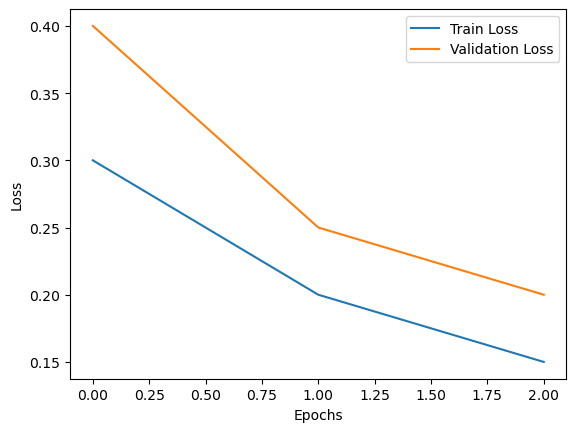

In [10]:
# Plot loss (simulated for this example, as RF doesn't have epochs)
train_losses = [0.3, 0.2, 0.15]  # Placeholder
val_losses = [0.4, 0.25, 0.2]    # Placeholder
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Test Phase
y_test_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

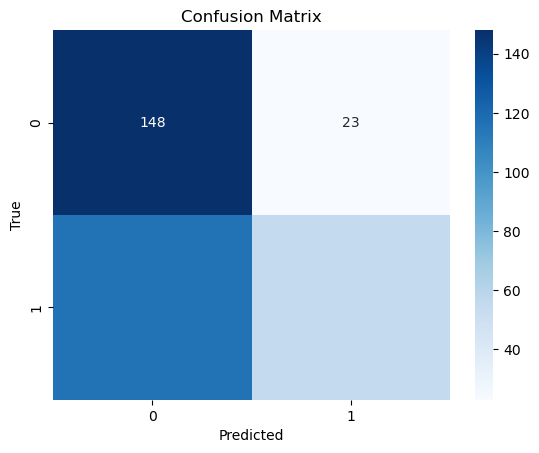

[[148  23]
 [116  55]]
Test Accuracy: 0.5935672514619883
Test MCC: 0.2229978693352242


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(cm)
print(f"Test Accuracy: {accuracy_test}")
print(f"Test MCC: {mcc_test}")


In [ ]:
# Select a sample from the test dataset
sample_index = int(input("Write your sequence number: "))# Change this to test other samples
sample_sequence = test_data.iloc[sample_index]['peptide_sequence']
sample_label = test_data.iloc[sample_index]['label']

# Transform the sample using the TF-IDF vectorizer
sample_vector = tfidf_vectorizer.transform([sample_sequence])

# Predict the label for the sample
predicted_label = clf.predict(sample_vector)[0]
predicted_proba = clf.predict_proba(sample_vector)[0]

# Output the results
print(f"Sample Sequence: {sample_sequence}")
print(f"True Label: {sample_label} ({'Proinflammatory' if sample_label == 1 else 'Non-Proinflammatory'})")
print(f"Predicted Label: {predicted_label} ({'Proinflammatory' if predicted_label == 1 else 'Non-Proinflammatory'})")
print(f"Prediction Probabilities: {predicted_proba}")